In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit    # sigmoid/logistic function



In [164]:
# %tensorflow_version 2.x
# for gpu use
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [165]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [166]:
# 3-layers in the model -> input,hidden,output

class neural_network:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.learning_rate = learning_rate
        self.input_hidden_weights = np.random.uniform(-1,1,(self.hidden_nodes,self.input_nodes))
        self.hidden_output_weights = np.random.uniform(-1,1,(self.output_nodes,self.hidden_nodes))
        
    def activation(self, layer):
        return expit(layer)
        
    def train(self,inputs,labels):
        inputs = np.array(inputs,ndmin=2).T  #transpose to make it valid for multiplication 
        labels = np.array(labels,ndmin=2).T
#         follwing snippet is like predict one because first we feed-forward then backwards
        hidden_layer_inputs = np.dot(self.input_hidden_weights,inputs) #this does sum of weights*input_values
        hidden_layer_outputs = self.activation(hidden_layer_inputs)   # this assigns some value to nodes/neurons
        output_layer_inputs = np.dot(self.hidden_output_weights,hidden_layer_outputs)
        output_layer_outputs = self.activation(output_layer_inputs)
#    ---------------------------------------------------------------------------
#       backpropagation
        final_errors = labels - output_layer_outputs
        hidden_errors = np.dot(self.hidden_output_weights.T, final_errors)
        
#         following are derivatives for  3 layers

        self.hidden_output_weights += self.learning_rate * np.dot((final_errors * output_layer_outputs *
        (1.0 - output_layer_outputs)), np.transpose(hidden_layer_outputs))

        self.input_hidden_weights += self.learning_rate * np.dot((hidden_errors* hidden_layer_outputs *
        (1.0 - hidden_layer_outputs)), np.transpose(inputs))
        
    
    def predict(self,inputs):
#     this is like feed-forwarding

        inputs = np.array(inputs,ndmin=2).T  #transpose to make it valid for multiplication
        
        hidden_layer_inputs = np.dot(self.input_hidden_weights,inputs) #this does sum of weights*input_values
        hidden_layer_outputs = self.activation(hidden_layer_inputs)   # this assigns some value to nodes/neurons
        
        output_layer_inputs = np.dot(self.hidden_output_weights,hidden_layer_outputs)
        output_layer_outputs = self.activation(output_layer_inputs)
        return output_layer_outputs



In [167]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.1

model = neural_network(input_nodes,hidden_nodes,output_nodes,learning_rate)

training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    model.train(inputs, targets)



In [168]:
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [169]:
# scorecard = []
# for record in test_data_list:
#     all_values = record.split(',')
#     correct_label = int(all_values[0])
#     # print(correct_label, "correct label")
#     inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#     outputs = model.predict(inputs)
#     label = np.argmax(outputs)
#     # print(label, "network's answer")
#     if (label == correct_label):
#         scorecard
#         scorecard.append(1)
#     else:
#         scorecard
#         scorecard.append(0)



In [170]:
# scorecard_array = np.asarray(scorecard)
# print ("performance = ", scorecard_array.sum() /
# scorecard_array.size)

performance =  0.9419


## Random Test

In [176]:
test = test_data_list[0]

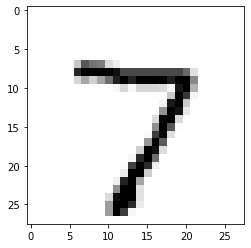

In [178]:
image_array= np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys',
interpolation='None')

In [179]:
all_values = test.split(',')
correct_label = int(all_values[0])
print(correct_label, "is Actual Label")
inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
outputs = model.predict(inputs)
label = np.argmax(outputs)
print(label, "is network's answer")

7 is Actual Label
7 is network's answer
